## Importing required packages

In [1]:
# !pip install numpy
# !pip install pandas
# !pip install scikit-learn
# !pip install matplotlib
# !pip install collections
# !pip install gdown

from collections import Counter
from numpy import mean, std
import numpy as np
from pandas import read_csv
import pandas as pd
import gdown

import copy
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import fbeta_score, f1_score,precision_score,recall_score,accuracy_score, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

from credit_data_actual_values import substitute

## Download data and Loading data

In [40]:
# Download the data directly from Google Drive
url = 'https://drive.google.com/uc?id=' + '1WC-3iPQJrud1WTer883rYdHMHGqgIVJ9' #(URI ID)
output = '/home/kiran/ta/data/german.data' # Destination directory
gdown.download(url, output, quiet=False) 

Downloading...
From: https://drive.google.com/uc?id=1BmICPGpdRg1dPmXi0G3Fe5IWs1MobCu8
To: /home/kiran/ta/data/iris.data
100%|██████████| 4.55k/4.55k [00:00<00:00, 8.02MB/s]


'/home/kiran/ta/data/iris.data'

In [3]:
#Load the data using pandas read_csv method
df=read_csv(output, sep=" ", header=None)
#Display the first few rows in the dataframe
df.head()

0   1    2    3     4    5    6   7    8     9  ...    11  12    13    14  \
0  A11   6  A34  A43  1169  A65  A75   4  A93  A101 ...  A121  67  A143  A152   
1  A12  48  A32  A43  5951  A61  A73   2  A92  A101 ...  A121  22  A143  A152   
2  A14  12  A34  A46  2096  A61  A74   2  A93  A101 ...  A121  49  A143  A152   
3  A11  42  A32  A42  7882  A61  A74   2  A93  A103 ...  A122  45  A143  A153   
4  A11  24  A33  A40  4870  A61  A73   3  A93  A101 ...  A124  53  A143  A153   

  15    16 17    18    19 20  
0  2  A173  1  A192  A201  1  
1  1  A173  1  A191  A201  2  
2  1  A172  2  A191  A201  1  
3  1  A173  2  A191  A201  1  
4  2  A173  2  A191  A201  2  

[5 rows x 21 columns]

In [4]:
#Download directly from website
df=read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data",\
               sep=" ",header=None)
#Display first few rows in the data frame
df.head()

0   1    2    3     4    5    6   7    8     9  ...    11  12    13    14  \
0  A11   6  A34  A43  1169  A65  A75   4  A93  A101 ...  A121  67  A143  A152   
1  A12  48  A32  A43  5951  A61  A73   2  A92  A101 ...  A121  22  A143  A152   
2  A14  12  A34  A46  2096  A61  A74   2  A93  A101 ...  A121  49  A143  A152   
3  A11  42  A32  A42  7882  A61  A74   2  A93  A103 ...  A122  45  A143  A153   
4  A11  24  A33  A40  4870  A61  A73   3  A93  A101 ...  A124  53  A143  A153   

  15    16 17    18    19 20  
0  2  A173  1  A192  A201  1  
1  1  A173  1  A191  A201  2  
2  1  A172  2  A191  A201  1  
3  1  A173  2  A191  A201  1  
4  2  A173  2  A191  A201  2  

[5 rows x 21 columns]

## Data Visualization

In [39]:
# Displaying data in human readable form with method substitute
# Make replica of the data for converting all the attribute values into human readable form
df_vis = copy.deepcopy(df)
# Call the method substitute from credit_data_actual_values.py to display the real world values
df_vis = substitute(df_vis)
# Display the first few rows of the data
df_vis.head(2)

Status of existing checking account  Duration in month  \
0                               <0 DM                  6   
1                        0 <= <200 DM                 48   

                             Credit history           Purpose  Credit amount  \
0                          critical account  radio/television           1169   
1  existing credits paid back duly till now  radio/television           5951   

  Savings account/bonds Present employment since  \
0    no savings account                >=7 years   
1               <100 DM            1<= < 4 years   

   Installment rate in percentage of disposable income  \
0                                                  4     
1                                                  2     

             Personal status and sex Other debtors / guarantors  \
0                        male:single                       none   
1  female:divorced/separated/married                       none   

         ...            Property Age in years  Other installment plans  \
0        ...         real estate           67                     none   
1        ...         real estate           22                     none   

  Housing Number of existing credits at this bank  \
0     own                                       2   
1     own                                       1   

                           Job  \
0  skilled employee / official   
1  skilled employee / official   

  Number of people being liable to provide maintenance for  Telephone  \
0                                                  1              yes   
1                                                  1             none   

  foreign worker Cost Matrix(Risk)  
0            yes         Good Risk  
1            yes          Bad Risk  

[2 rows x 21 columns]

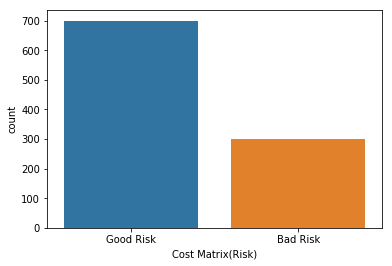

In [6]:
#Task2: Visualize the histogram of data classes
import seaborn as sns
# countplot show the distribution of values of the particular attribute
sns.countplot(x="Cost Matrix(Risk)", data=df_vis)
#show the plot
plt.show()

## Prepare Data

In [ ]:
# split the data frame into inputs and outputs
last_ix = len(df.columns) - 1
X, y = df.drop(last_ix, axis=1), df[last_ix]

In [7]:
# Categorical features has to be converted into integer values for the model to process. 
#This is done through one hot encoding.
# select categorical features
cat_ix = X.select_dtypes(include=['object', 'bool']).columns
# one hot encode categorical features only
ct = ColumnTransformer([('o',OneHotEncoder(),cat_ix)], remainder='passthrough')
X = ct.fit_transform(X)
# label encode the target variable to have the classes 0 and 1
y = LabelEncoder().fit_transform(y)
print(X.shape, y.shape, Counter(y))

(1000, 61) (1000,) Counter({0: 700, 1: 300})


In [8]:
#Splitting the data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

## Train the Model

Hyper Parameters for Logistic Regression
1. penalty: Used to specify the norm used in the penalization. 
2. C: Inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization.
3. max_iter: Maximum number of iterations taken for the solvers to converge.

In [35]:
# Declaring and training a classifier
# Logistic regression classifier
clf = LogisticRegression(penalty='l2',C=1.0, max_iter=10000)
clf.fit(X_train, y_train)


LogisticRegression(max_iter=10000)

Hyper Parameters for Decision Trees
1. criterion: The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.
2. splitter: The strategy used to choose the split at each node. Supported strategies are “best” to choose the best split and “random” to choose the best random split.
3. max_depth: The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples
4. min_samples_split: The minimum number of samples required to split an internal node

In [45]:
# Decision Tree classifier
clf = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2)
clf.fit(X_train, y_train)

DecisionTreeClassifier()

Hyper Parameters for SVM
1. kernel: (‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed') Specifies the kernel type to be used in the algorithm.
2. degree: Degree of the polynomial kernel function (‘poly’). Ignored by all other kernels.
3. gamma: Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.
4. max_iter: Hard limit on iterations within solver, or -1 for no limit.

In [41]:
# SVM classifier
clf = SVC(kernel='poly', degree=3, max_iter=300000)
clf.fit(X_train, y_train)

SVC(kernel='poly', max_iter=300000)

In [ ]:
# Task 3 Implement KNN using sklearn
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)

In [49]:
# Task 4 Implement two other classifier of your choice

## Evaluate the Model

In [46]:
#Predicting for test data
y_pred = clf.predict(X_test)

In [47]:
#Calculating results for various evaluation metric
precision = precision_score(y_test,y_pred, average='micro')
recall = recall_score(y_test,y_pred, average='micro')
accuracy = accuracy_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred, average='macro')

In [48]:
print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1-score: {f1}")

Accuracy: 0.685
Recall: 0.685
Precision: 0.685
F1-score: 0.6301840274720437


## Visualization of Results

In [ ]:
## Task 5: Insert the code for visualizing the comfusion matrix here
#calculate the confusion matrix by passing the target labels and predicted labels
cm = confusion_matrix(y_test, y_pred)

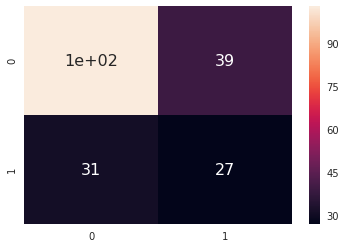

In [21]:
#Convert the values into dataframe for dispalying
df_cm = pd.DataFrame(cm, range(cm.shape[0]), range(cm.shape[1]))
sns.set(font_scale=1) # for label size
#Display the confusion matrix in the form of heatmap
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size
#Show the plot
plt.show()

In [22]:
# Task 5 Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

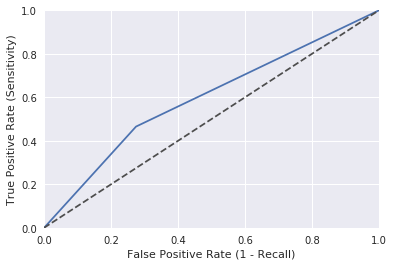



Area Under Curve: 0.60




In [23]:
# Display the values into a plot
fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.xlabel('False Positive Rate (1 - Recall)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.show()
print("\n")
print ("Area Under Curve: %.2f" %auc(fpr, tpr))
print("\n")

## Bonus

## K-Fold Validation

In [30]:
# Task 6: k-fold validation:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
# Declare the number of splits to be used in k-fold validation
kf = KFold(shuffle=True, n_splits=5)
# Declare the metric to be used for evaluation in k-fold validation
metric = make_scorer(f1_score)
# Pass the model, data, labels, metric in cross validation method
scores = cross_val_score(clf, X, y, scoring=metric, cv=kf, n_jobs=-1)

## KNN Implementation

In [52]:
# Task 7: Implement KNN
# Example of making predictions
from math import sqrt
 
# calculate the Euclidean distance between two vectors
def euclidean_distance(row1, row2):
    distance = 0.0
    for i in range(len(row1)-1):
        distance += (row1[i] - row2[i])**2
    return sqrt(distance)
 
# Locate the most similar neighbors
def get_neighbors(train, test_row, num_neighbors):
    distances = list()
    for train_row in train:
        dist = euclidean_distance(test_row, train_row)
        distances.append((train_row, dist))
    distances.sort(key=lambda tup: tup[1])
    neighbors = list()
    for i in range(num_neighbors):
        neighbors.append(distances[i][0])
    return neighbors
 
# Make a classification prediction with neighbors
def predict_classification(train, test_row, num_neighbors):
    neighbors = get_neighbors(train, test_row, num_neighbors)
    output_values = [row[-1] for row in neighbors]
    prediction = max(set(output_values), key=output_values.count)
    return prediction

prediction = predict_classification(X, X[101], 3)
print('Expected %d, Got %d.' % (y[101], prediction))

Expected 0, Got 1.
